# Neural Network practice - Classification and Regression

The University of California, Irvine - UCI - is a well-known repository that concentrates a lot of free-use datasets for machine learning applications and research

https://archive.ics.uci.edu/ml/index.php

In [3]:
### import the libraries and modules required

# libraries to manipulate the data and to visualise it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# this is the library that contains the NN capabilities
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# the evaluation metrics for regression
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from math import sqrt
import seaborn as sn
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

## Import the data, prepare and visualise it

In the iris.names file it is described the details of the dataset, including the attribute Information:

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [6]:
# generate a pandas dataframe with the file that contains the dataset
dataset = pd.read_csv(filepath_or_buffer = 'iris.data', names = ['sepal length','sepal width','petal length','petal width', 'species'])

# take a look of the data
print('The dataset contains {} observations and {} features\n'.format(dataset.shape[0],dataset.shape[1]))

dataset.head()

The dataset contains 150 observations and 5 features



,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# check how many observations we have for each class/species
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
# use the five-number analysis to get statiscally explore the dataset
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


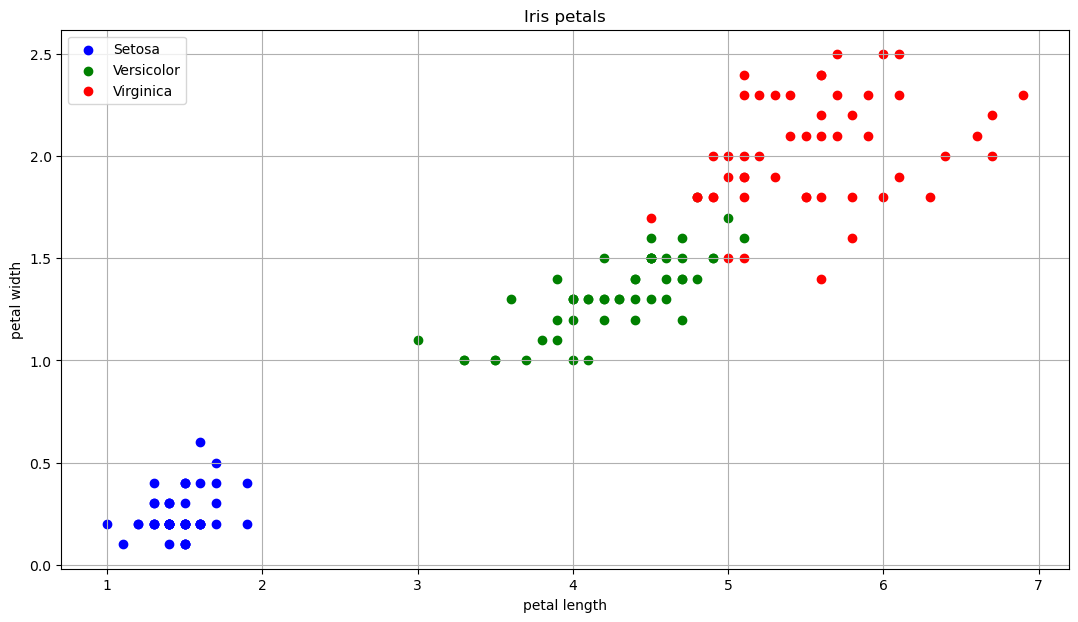

In [9]:
### visualise the dataset
# plot the petal length vs the petal width (a two dimmensional data)

setosa = dataset[dataset.species == "Iris-setosa"]
versicolor = dataset[dataset.species=='Iris-versicolor']
virginica = dataset[dataset.species=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length'], setosa['petal width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length'], versicolor['petal width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length'], virginica['petal width'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

## Generating the Training and Testing datasets

In [10]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('species', axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]

# y will be our dataset with the feature of interest
y = dataset['species']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [11]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sepal length            4.3
sepal width             2.0
petal length            1.0
petal width             0.1
species         Iris-setosa
dtype: object
Max values of the dataset are: 
sepal length               7.9
sepal width                4.4
petal length               6.9
petal width                2.5
species         Iris-virginica
dtype: object
Min values of the scaled dataset are: 
-1.6626185422078956
Max values of the scaled dataset are: 
1.6418617534492592


## Classification

In [ ]:
# defining a Multi-layer Perceptron classifier
mlp_clf = MLPClassifier(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=(2),
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

### Training

In [ ]:
# training the model
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=2, max_iter=300)

### Testing

In [ ]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica',

### Evaluation

In [ ]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# precision, recall, f1-score, and support
#   please be aware of the metrics we have and what we can use
#   the f1-score is for binary targets
print(classification_report(y_test, y_pred))

Accuracy: 0.31
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        29
Iris-versicolor       0.00      0.00      0.00        23
 Iris-virginica       0.31      1.00      0.47        23

       accuracy                           0.31        75
      macro avg       0.10      0.33      0.16        75
   weighted avg       0.09      0.31      0.14        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


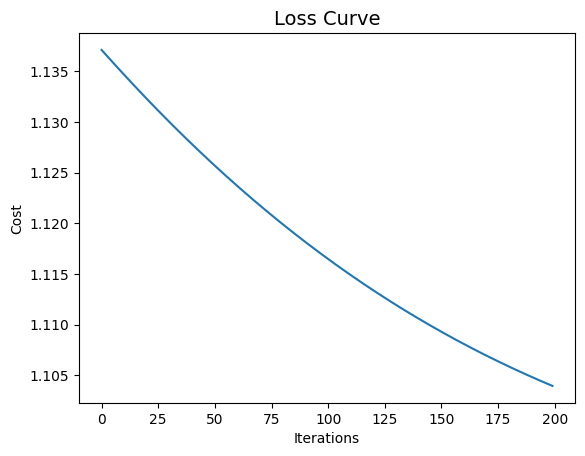

In [ ]:
# see how well was the training of the model
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

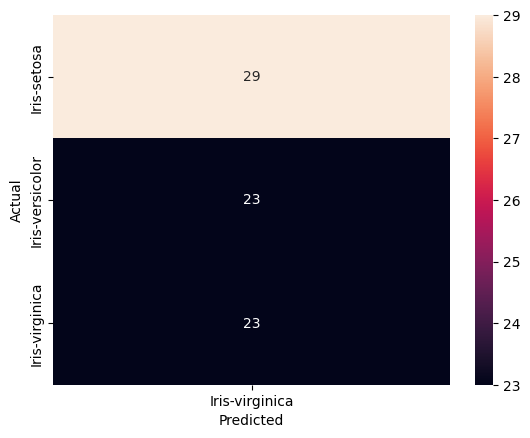

In [ ]:
### see how well was the testing of the model

# generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
# take a look at the predictions
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# take a look at the true examples
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
                     0
count               75
unique               1
top     Iris-virginica
freq                75

Groundtruth 
count              75
unique              3
top       Iris-setosa
freq               29
Name: species, dtype: object


## Hyper parameter Tuning

In [ ]:
# we can define a set of parameters that we are interested to train with our 
#   model
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80), (100)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    # Strength of the L2 regularization term
    # “Regularization is any modification we make to a learning algorithm that 
    #   is intended to reduce its generalization error but not its training 
    #   error.” — Ian Goodfellow
    'alpha': [0.0001, 0.05],
    # a value that works as the temperature in the simulated annealing algorithm
    #   but for the stochastic gradient descent algorithm
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
# we define a grid search approach to train several models with Cross-validation

grid = GridSearchCV(
    # the structure of the model we are interest in
    mlp_clf,
    # the different hyper parameters we want to train
    param_grid,
    # use paralelisation. -1 = use all processors
    n_jobs = -1,
    # number of folds use in cross-validation approach
    cv = 5
    )

In [ ]:
# execute the hyper parameter tuning
#   this process can take a while
grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=2, max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80), 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

In [ ]:
# get the best values for each hyper parameter tuned
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'sgd'}


In [ ]:
# save the results as pandas dataframe to easily interact with the data
grid_results = pd.DataFrame(grid.cv_results_)

In [ ]:
# show the results of the grid search hyper parameter tuning by best scores
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.170103,0.551462,0.004045,0.003339,tanh,0.0001,"(150, 100, 50)",constant,100,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.866667,0.933333,1.000000,1.000000,1.000000,0.960000,0.053333,1
135,0.092521,0.001253,0.001997,0.000178,relu,0.05,100,constant,100,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.866667,0.933333,1.000000,1.000000,1.000000,0.960000,0.053333,1
22,0.359766,0.057084,0.002040,0.000053,tanh,0.0001,"(120, 80)",adaptive,150,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.866667,0.933333,1.000000,1.000000,1.000000,0.960000,0.053333,1
38,0.276719,0.012332,0.002876,0.001066,tanh,0.05,"(150, 100, 50)",constant,100,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.866667,0.933333,1.000000,1.000000,0.933333,0.946667,0.049889,4
105,0.157016,0.044220,0.003519,0.003350,relu,0.0001,100,adaptive,100,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.866667,0.866667,1.000000,1.000000,1.000000,0.946667,0.065320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.053236,0.000859,0.002197,0.000281,tanh,0.05,100,constant,50,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.600000,0.600000,0.800000,0.800000,0.800000,0.720000,0.097980,140
90,0.082799,0.003405,0.002217,0.000150,relu,0.0001,"(120, 80)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.600000,0.733333,0.800000,0.733333,0.666667,0.706667,0.067987,141
138,0.044574,0.001606,0.001837,0.000052,relu,0.05,100,adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.866667,0.666667,0.666667,0.666667,0.666667,0.706667,0.080000,142
140,0.086262,0.001926,0.001919,0.000061,relu,0.05,100,adaptive,100,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.600000,0.666667,0.733333,0.666667,0.666667,0.666667,0.042164,143


## Regression

Regression only works with numeric values.

Let's take a look at the original dataset one more time.

In [ ]:
dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


As we can see, the species values are not adequate for this purpose; at least, not until we code them

In [ ]:
# here we generate a straight forward coder
def coder(specie):
    if specie == 'Iris-setosa':
        return 0
    elif specie == 'Iris-versicolor':
        return 1
    else:
        return 2

# applying the coder to the feature of interest
dataset['species'] = dataset['species'].apply(coder)

In [ ]:
dataset.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

### Generating the Training and Testing datasets

In [ ]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('species', axis=1)

# converting into numpy array and assigning sepal length and sepal width
X = X.to_numpy()[:, (0,1)]

# y will be our dataset with the feature of interest
y = dataset['species']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [ ]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sepal length    4.3
sepal width     2.0
petal length    1.0
petal width     0.1
species         0.0
dtype: float64
Max values of the dataset are: 
sepal length    7.9
sepal width     4.4
petal length    6.9
petal width     2.5
species         2.0
dtype: float64
Min values of the scaled dataset are: 
-2.055362392160273
Max values of the scaled dataset are: 
2.647585454308145


### Defining the regression model

In [ ]:
# defining a Multi-layer Perceptron regresor
mlp_reg = MLPRegressor(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=(2),
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

### Training

In [ ]:
# training the model
mlp_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=2, max_iter=300)

### Testing

In [ ]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_reg.predict(X_test_scaled)
y_pred

array([1.63599244, 2.29487686, 2.68073083, 1.63217492, 2.15454411,
       1.64595528, 1.33585968, 2.49510645, 1.28850352, 1.34349472,
       2.28949619, 1.04628115, 1.82754571, 1.04628115, 1.83023605,
       2.23876621, 2.08119561, 1.05481452, 1.3396772 , 1.85822887,
       1.06192065, 1.77651502, 1.33619474, 1.85822887, 3.99855985,
       2.23607588, 1.86968144, 2.5218166 , 1.04628115, 1.04628115,
       1.23473478, 2.91977861, 2.34022617, 1.18131447, 1.05183667,
       1.5733662 , 2.21205606, 1.59522531, 1.54449533, 2.22012706,
       1.34349472, 2.1105961 , 2.34022617, 2.16670674, 1.95840616,
       1.04628115, 1.78415006, 2.10790577, 2.15863575, 3.24817831,
       1.40993849, 2.9330371 , 1.40612096, 1.51778517, 2.82125341,
       1.34349472, 1.49107501, 1.44034503, 1.83023605, 1.04628115,
       1.71388877, 1.18131447, 1.04628115, 1.30948459, 1.1953371 ,
       1.41363488, 1.48019978, 3.84367958, 1.05855932, 1.78033254,
       1.12889333, 2.55659776, 1.70243621, 1.34349472, 1.14034

### Evaluation

In [ ]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# r2
#   Best possible score is 1.0 and it can be negative 
#   (because the model can be arbitrarily worse)
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))

# mean square error
#   Best value is 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# explained_variance_score
#   Best value is 1.0, lower values are worse
print('explained variance: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

r2: -1.01
mse: 1.38
explained variance: 0.05


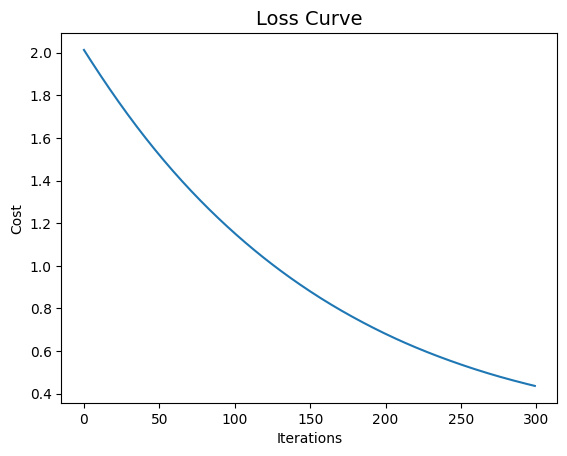

In [ ]:
# see how well was the training of the model
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

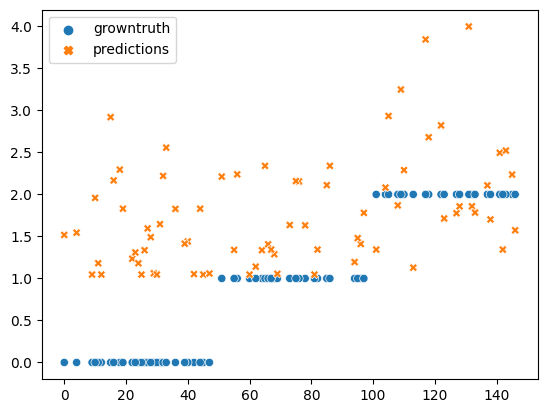

In [ ]:
### see how well was the testing of the model

regression_res_df = pd.DataFrame({'growntruth': y_test,'predictions': y_pred})

sn.scatterplot(regression_res_df)